# Image Classification using Convolutional Neural Network (CNN)

- Classifying small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

## The CIFAR-10 dataset
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

- The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
 

- Number of Images: The CIFAR-10 dataset consists of a total of 60,000 images.

- Classes: There are 10 distinct classes in the dataset. Each class represents a different category or object. These classes can include things like animals, vehicles, and everyday objects.

- Class Balance: The dataset is balanced, meaning that it contains an equal number of images for each class. Specifically, there are 6,000 images per class.

- Training and Test Split: The dataset is divided into two main sets:

- Training Set: This set contains 50,000 images. It is further divided into five training batches, each containing 10,000 images. The images within these training batches are randomly ordered.

- Test Set: This set contains 10,000 images. It is also divided into batches, with each batch containing 1,000 randomly-selected images from each class.

<img src="image.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np

- Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

50K training dataset each of 32x32 pixel and 3- RGB

In [3]:
X_test.shape

(10000, 32, 32, 3)

 - Indicates the number of test samples, the height and width of each image, and the number of color channels (usually 3 for RGB images).

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

- The format of the data suggests that each image is represented as a 3D NumPy array. In this case, it's a 3D array with dimensions (height, width, channels). The values in the array represent pixel intensities.

- (e.g., [59, 62, 63]): This dimension represents the color channels, typically Red, Green, and Blue (RGB). Each set of three numbers in this dimension represents the color of a specific pixel at a certain position in the image.

- The first dimension represents color channels (RGB).
The second dimension represents pixels in the same row.
The third dimension represents pixels in different rows but at the same horizontal position.

- X_train[0] is a 3D array with dimensions (32, 32, 3).
The first dimension (32) represents the height of the image.
The second dimension (32) represents the width of the image.
The third dimension (3) represents the color channels, typically Red, Green, and Blue (RGB).

- X_train[0] as a collection of 32x32 2D matrices, where each matrix represents the pixel values for a specific color channel at a particular position in the image. These matrices combine to create the complete color image.

In [33]:
X_train[0].ndim

3

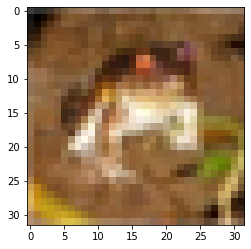

In [5]:
plt.imshow(X_train[0])

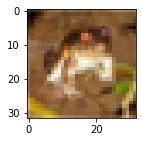

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

- y_train is a 2D array, for our classification only 1D array is enough so flattening 2D into 1D

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

- -1 in reshape When we don't want to explicitly tell the dimension 
- If you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).

In [10]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

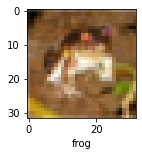

In [12]:
plot_sample(X_train, y_train, 0)

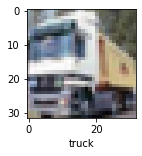

In [13]:
plot_sample(X_train, y_train, 1)

- Normalizing the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

#### Normalizing the training data

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

- Building simple artificial neural network ANN for image classification

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.8120 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6236 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5417 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4817 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4334 - accuracy: 0.4954


- At the end of 5 epochs, accuracy is at around 49%

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.45      0.52      1000
           1       0.76      0.39      0.51      1000
           2       0.46      0.16      0.24      1000
           3       0.28      0.59      0.38      1000
           4       0.36      0.54      0.43      1000
           5       0.47      0.24      0.32      1000
           6       0.46      0.62      0.53      1000
           7       0.69      0.36      0.47      1000
           8       0.53      0.69      0.60      1000
           9       0.54      0.60      0.57      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



- y_pred_classes = [np.argmax(element) for element in y_pred]: Converts the predicted class probabilities into class labels by selecting the class with the highest probability for each sample. This is done using NumPy's argmax function.

#### Building a convolutional neural network to train our images

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4344 - accuracy: 0.4888
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0816 - accuracy: 0.6230
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9466 - accuracy: 0.6682
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8558 - accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7862 - accuracy: 0.7275
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7245 - accuracy: 0.7478
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6707 - accuracy: 0.7654
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6234 - accuracy: 0.7813
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5805 - accuracy: 0.7972
Epoch 10/10
1563/1563 [==============================] - 42s 27m

- With CNN, at the end 5 epochs, accuracy was at 72.75% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9548 - accuracy: 0.7024


[0.9547893404960632, 0.7024000287055969]

In [23]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

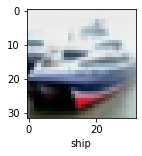

In [24]:
plot_sample(X_test, y_test, 1)

In [26]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [27]:
y_pred[:5]

array([[1.1905449e-02, 3.3590419e-04, 1.2831535e-02, 7.2752959e-01,
        1.7773390e-03, 2.4057467e-01, 2.3080206e-03, 1.4695883e-04,
        2.5635038e-03, 2.7134171e-05],
       [2.3253059e-03, 1.1788883e-01, 1.3063326e-08, 1.6976207e-06,
        3.3839886e-09, 1.7096216e-09, 4.2172936e-09, 7.6196655e-10,
        8.7930846e-01, 4.7571017e-04],
       [1.7189639e-02, 8.5368115e-01, 6.4464397e-04, 4.8455507e-03,
        5.5330986e-04, 7.9246867e-04, 1.9059076e-04, 2.1076303e-04,
        6.0015947e-02, 6.1875924e-02],
       [9.4497722e-01, 3.3409821e-03, 6.4745598e-04, 5.1853788e-04,
        7.0681219e-04, 3.7937957e-07, 1.3994201e-04, 5.4724626e-07,
        4.9641985e-02, 2.6235561e-05],
       [8.7389964e-07, 4.9279458e-07, 4.7613718e-03, 1.1104494e-02,
        3.6977741e-01, 6.4146827e-04, 6.1363280e-01, 2.0078907e-05,
        6.0920123e-05, 5.2667723e-08]], dtype=float32)

In [28]:
np.argmax([y_pred[0]])

3

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

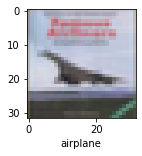

In [31]:
plot_sample(X_test, y_test,3)


In [32]:
classes[y_classes[3]]

'airplane'